In [3]:
# Import packages
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pickle
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [47]:
# Load the data
atlantic = pickle.load(open('./../Data/atlantic_series.pickle', 'rb'))

# Set up to train on a single hurricane (ALEX)
alex = atlantic[0]
cutoff = alex.shape[0]//5*4
X = alex.iloc[1:cutoff, 4:].to_numpy() # Train on 80% of the data
y = alex.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
y_test = alex.iloc[cutoff-1:, 2:4].to_numpy()
lat = y[:, 0]
long = y[:, 1]

In [48]:
# Make and train a model
lat_model = ARIMA(lat, order=(3, 0, 3), trend='c').fit(method='innovations_mle')
long_model = ARIMA(long, order=(3, 0, 3), trend='c').fit(method='innovations_mle')

In [53]:
pred_lat = model.predict(start=0, end=alex.shape[0])
pred_long = model.predict(start=0, end=alex.shape[0])
pred_lat

array([35.3034529 , 30.33188822, 31.67916939, 31.93183208, 31.71617371,
       31.7276617 , 31.4318495 , 31.42624467, 31.2379354 , 32.50074473,
       32.7686603 , 33.63389499, 35.46553575, 35.98065277, 36.74401349,
       37.51030444, 37.66386854, 38.34818585, 39.14575882, 40.41536343,
       41.08153405, 41.58902704, 42.03148974, 42.32492619, 42.55841475,
       42.65585206])

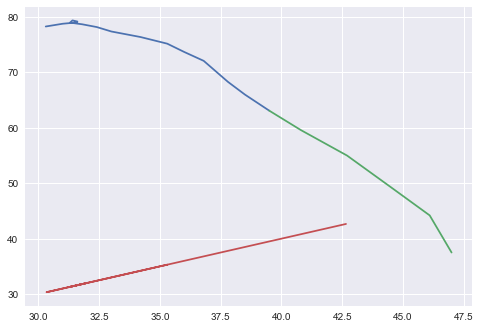

In [54]:
plt.plot(y[:, 0], y[:, 1])
plt.plot(y_test[:, 0], y_test[:, 1])
plt.plot(pred_lat, pred_long)